In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
data = pd.read_csv("D:\KULIAH CAKRA\cakra\Tugas Akhir\Dataset baru\covid_19_indonesia_time_series_all.csv")

data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,39,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,100.00%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,95.12%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,0,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,90.70%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20811,11/5/2021,ID-ST,Sulawesi Tengah,11,0,0,11,47056,1595,45307,...,-1.004137,3.72,15921.14,0.00,539.66,53.97,3.39%,96.28%,1.57,0.0
20812,11/5/2021,ID-SA,Sulawesi Utara,3,1,1,1,34636,1039,33162,...,1.259638,1.14,13110.34,0.38,393.28,39.33,3.00%,95.74%,1.50,NaN
20813,11/5/2021,ID-SB,Sumatera Barat,1,0,3,-2,89786,2147,87424,...,-0.850253,0.18,16267.80,0.00,389.00,38.90,2.39%,97.37%,1.00,1.0
20814,11/5/2021,ID-SS,Sumatera Selatan,1,0,0,1,59878,3068,56734,...,-3.216212,0.12,7286.60,0.00,373.35,37.33,5.12%,94.75%,0.25,1.0


# DATA CLEANING

In [2]:
# Cleaning Data, Removing "Indonesia"

data.drop(data[(data['Location']== 'Indonesia')].index , inplace =True)
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,39,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,100.00%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,95.12%,1.00,1.0
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,0,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,90.70%,1.00,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,2,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,200.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20811,11/5/2021,ID-ST,Sulawesi Tengah,11,0,0,11,47056,1595,45307,...,-1.004137,3.72,15921.14,0.00,539.66,53.97,3.39%,96.28%,1.57,0.0
20812,11/5/2021,ID-SA,Sulawesi Utara,3,1,1,1,34636,1039,33162,...,1.259638,1.14,13110.34,0.38,393.28,39.33,3.00%,95.74%,1.50,NaN
20813,11/5/2021,ID-SB,Sumatera Barat,1,0,3,-2,89786,2147,87424,...,-0.850253,0.18,16267.80,0.00,389.00,38.90,2.39%,97.37%,1.00,1.0
20814,11/5/2021,ID-SS,Sumatera Selatan,1,0,0,1,59878,3068,56734,...,-3.216212,0.12,7286.60,0.00,373.35,37.33,5.12%,94.75%,0.25,1.0


In [3]:
# Remove column

data.dropna(subset = ["Growth Factor of New Cases","Growth Factor of New Deaths"], inplace=True)
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.00,1.0
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.00,1.0
7,3/3/2020,ID-RI,Riau,0,0,0,0,2,0,0,...,0.511648,0.00,0.33,0.0,0.00,0.00,0.00%,0.00%,0.00,1.0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,39,...,-6.204699,0.18,4.15,0.0,1.84,0.18,44.44%,86.67%,1.00,1.0
10,3/4/2020,ID-JB,Jawa Barat,1,0,0,1,2,1,2,...,-6.920432,0.02,0.04,0.0,0.02,0.00,50.00%,100.00%,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20807,11/5/2021,ID-PB,Papua Barat,11,0,0,11,23170,355,22719,...,-2.045160,9.64,20312.07,0.0,311.21,31.12,1.53%,98.05%,1.57,1.0
20809,11/5/2021,ID-SR,Sulawesi Barat,5,0,0,5,12337,345,11962,...,-2.461746,3.21,7908.41,0.0,221.16,22.12,2.80%,96.96%,2.50,1.0
20811,11/5/2021,ID-ST,Sulawesi Tengah,11,0,0,11,47056,1595,45307,...,-1.004137,3.72,15921.14,0.0,539.66,53.97,3.39%,96.28%,1.57,0.0
20813,11/5/2021,ID-SB,Sumatera Barat,1,0,3,-2,89786,2147,87424,...,-0.850253,0.18,16267.80,0.0,389.00,38.90,2.39%,97.37%,1.00,1.0


In [4]:
# Create new directory from old directory

cdf = data[[  'New Cases','Total Cases', 'New Deaths','Total Deaths', 'New Recovered',   'Total Recovered',]]
cdf

,New Cases,Total Cases,New Deaths,Total Deaths,New Recovered,Total Recovered
1,2,41,0,20,0,39
4,2,43,0,20,0,39
7,0,2,0,0,0,0
8,2,45,0,20,0,39
10,1,2,0,1,0,2
...,...,...,...,...,...,...
20807,11,23170,0,355,0,22719
20809,5,12337,0,345,0,11962
20811,11,47056,0,1595,0,45307
20813,1,89786,0,2147,3,87424


In [5]:
ccdf = data[[    'Total Recovered','Total Deaths',]]
ccdf 

,Total Recovered,Total Deaths
1,39,20
4,39,20
7,0,0
8,39,20
10,2,1
...,...,...
20807,22719,355
20809,11962,345
20811,45307,1595
20813,87424,2147


In [6]:

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in cdf.columns:
    replace_with_thresholds(cdf, col)

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
x_array = np.array(ccdf[[ 'Total Recovered','Total Deaths']])
print(x_array)


[[   39    20]
 [   39    20]
 [    0     0]
 ...
 [45307  1595]
 [87424  2147]
 [56734  3068]]


# DATA NORMALIZATION


In [8]:
# The values in the data are too large, need to be minimized for easy understanding

dataa = data[[    'Total Recovered','Total Deaths',]]
print('Original')
dataa

scaler = MinMaxScaler()

df_scaled= scaler.fit_transform(ccdf.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Total Recovered','Total Deaths'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled

Original
Scaled Dataset Using MinMaxScaler


,Total Recovered,Total Deaths
0,0.000046,0.000663
1,0.000046,0.000663
2,0.000000,0.000000
3,0.000046,0.000663
4,0.000002,0.000033
...,...,...
16931,0.026823,0.011777
16932,0.014123,0.011445
16933,0.053491,0.052913
16934,0.103215,0.071225


In [9]:
scaler = MinMaxScaler()
x_scaled= scaler.fit_transform(x_array)
print(x_scaled)

[[4.60445381e-05 6.63481953e-04]
 [4.60445381e-05 6.63481953e-04]
 [0.00000000e+00 0.00000000e+00]
 ...
 [5.34907663e-02 5.29126858e-02]
 [1.03215326e-01 7.12247877e-02]
 [6.69818159e-02 1.01778132e-01]]


# ELBOW & DBI

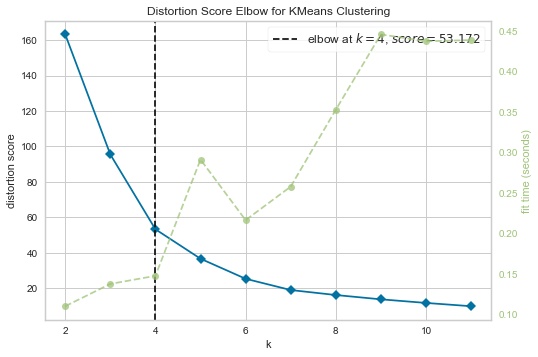

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Using Elbow Method to determine the ideal clusters to use

from yellowbrick.cluster import KElbowVisualizer

model= KMeans()
visualizer = KElbowVisualizer(model, k=(2,12)).fit(df_scaled)
visualizer.show()


[0.5324620186112874]
[0.5324620186112874, 0.6998480191274692]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514, 0.6369808350263503]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514, 0.6369808350263503, 0.5102298616019799]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514, 0.6369808350263503, 0.5102298616019799, 0.5420855300985872]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514, 0.6369808350263503, 0.5102298616019799, 0.5420855300985872, 0.5474216873675786]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514, 0.6369808350263503, 0.5102298616019799, 0.5420855300985872, 0.5474216873675786, 0.5407463375435285]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514, 0.6369808350263503, 0.5102298616019799, 0.5420855300985872, 0.5474216873675786, 0.5407463375435285, 0.602022839656019]
[0.5324620186112874, 0.6998480191274692, 0.4948209984073514, 0.6369808350263503, 0.510229861

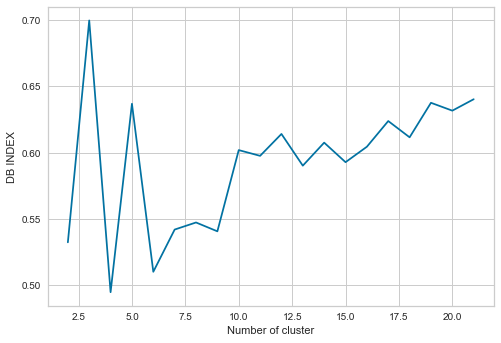

In [11]:
# Davies Bouldin Index for make sure the number of cluster

from sklearn.metrics import davies_bouldin_score
dbi = []
k_rng = range(2,22)

for k in k_rng:
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(df_scaled)
    clusters = kmeans.labels_
    dbi.append(davies_bouldin_score(df_scaled,clusters))
    print(dbi)

plt.plot(k_rng,dbi)
plt.xlabel("Number of cluster")
plt.ylabel("DB INDEX")
plt.show()

# POINT OF CENTROID

In [12]:
mms = MinMaxScaler()
mms.fit(df_scaled)

data_transformed = mms.transform(x_scaled)

In [13]:
kmeans = KMeans (n_clusters = 4, random_state=123)

kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=123)

In [14]:
kmeans = KMeans (n_clusters = 4, random_state=123)

kmeans.fit(df_scaled)
print(kmeans.cluster_centers_)



[[0.01798573 0.01733607]
 [0.43928286 0.90937682]
 [0.84292539 0.42623186]
 [0.21282897 0.20442372]]


# RESULT OF CLUSTER

In [15]:
print(kmeans.labels_)

data["kluster"] = kmeans.labels_
data

[0 0 0 ... 0 0 0]


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,kluster
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.00,1.0,0
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.00,1.0,0
7,3/3/2020,ID-RI,Riau,0,0,0,0,2,0,0,...,0.00,0.33,0.0,0.00,0.00,0.00%,0.00%,0.00,1.0,0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,39,...,0.18,4.15,0.0,1.84,0.18,44.44%,86.67%,1.00,1.0,0
10,3/4/2020,ID-JB,Jawa Barat,1,0,0,1,2,1,2,...,0.02,0.04,0.0,0.02,0.00,50.00%,100.00%,1.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20807,11/5/2021,ID-PB,Papua Barat,11,0,0,11,23170,355,22719,...,9.64,20312.07,0.0,311.21,31.12,1.53%,98.05%,1.57,1.0,0
20809,11/5/2021,ID-SR,Sulawesi Barat,5,0,0,5,12337,345,11962,...,3.21,7908.41,0.0,221.16,22.12,2.80%,96.96%,2.50,1.0,0
20811,11/5/2021,ID-ST,Sulawesi Tengah,11,0,0,11,47056,1595,45307,...,3.72,15921.14,0.0,539.66,53.97,3.39%,96.28%,1.57,0.0,0
20813,11/5/2021,ID-SB,Sumatera Barat,1,0,3,-2,89786,2147,87424,...,0.18,16267.80,0.0,389.00,38.90,2.39%,97.37%,1.00,1.0,0


In [16]:
# Result of the Cluster

data['kluster'].value_counts()

0    15315
3     1191
2      222
1      208
Name: kluster, dtype: int64

# CLUSTER 0

df_scaled['kluster'].value_counts()

In [17]:
## HASIL CLUSTER 0

hasil_cluster0 = data[data["kluster"]<=0]

hasil_cluster0


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,kluster
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.00,1.0,0
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.00,1.0,0
7,3/3/2020,ID-RI,Riau,0,0,0,0,2,0,0,...,0.00,0.33,0.0,0.00,0.00,0.00%,0.00%,0.00,1.0,0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,39,...,0.18,4.15,0.0,1.84,0.18,44.44%,86.67%,1.00,1.0,0
10,3/4/2020,ID-JB,Jawa Barat,1,0,0,1,2,1,2,...,0.02,0.04,0.0,0.02,0.00,50.00%,100.00%,1.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20807,11/5/2021,ID-PB,Papua Barat,11,0,0,11,23170,355,22719,...,9.64,20312.07,0.0,311.21,31.12,1.53%,98.05%,1.57,1.0,0
20809,11/5/2021,ID-SR,Sulawesi Barat,5,0,0,5,12337,345,11962,...,3.21,7908.41,0.0,221.16,22.12,2.80%,96.96%,2.50,1.0,0
20811,11/5/2021,ID-ST,Sulawesi Tengah,11,0,0,11,47056,1595,45307,...,3.72,15921.14,0.0,539.66,53.97,3.39%,96.28%,1.57,0.0,0
20813,11/5/2021,ID-SB,Sumatera Barat,1,0,3,-2,89786,2147,87424,...,0.18,16267.80,0.0,389.00,38.90,2.39%,97.37%,1.00,1.0,0


In [18]:
data['Date']=pd.to_datetime(hasil_cluster0['Date'])
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,kluster
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.00,1.0,0
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.00,1.0,0
7,2020-03-03,ID-RI,Riau,0,0,0,0,2,0,0,...,0.00,0.33,0.0,0.00,0.00,0.00%,0.00%,0.00,1.0,0
8,2020-03-04,ID-JK,DKI Jakarta,2,0,0,2,45,20,39,...,0.18,4.15,0.0,1.84,0.18,44.44%,86.67%,1.00,1.0,0
10,2020-03-04,ID-JB,Jawa Barat,1,0,0,1,2,1,2,...,0.02,0.04,0.0,0.02,0.00,50.00%,100.00%,1.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20807,2021-11-05,ID-PB,Papua Barat,11,0,0,11,23170,355,22719,...,9.64,20312.07,0.0,311.21,31.12,1.53%,98.05%,1.57,1.0,0
20809,2021-11-05,ID-SR,Sulawesi Barat,5,0,0,5,12337,345,11962,...,3.21,7908.41,0.0,221.16,22.12,2.80%,96.96%,2.50,1.0,0
20811,2021-11-05,ID-ST,Sulawesi Tengah,11,0,0,11,47056,1595,45307,...,3.72,15921.14,0.0,539.66,53.97,3.39%,96.28%,1.57,0.0,0
20813,2021-11-05,ID-SB,Sumatera Barat,1,0,3,-2,89786,2147,87424,...,0.18,16267.80,0.0,389.00,38.90,2.39%,97.37%,1.00,1.0,0


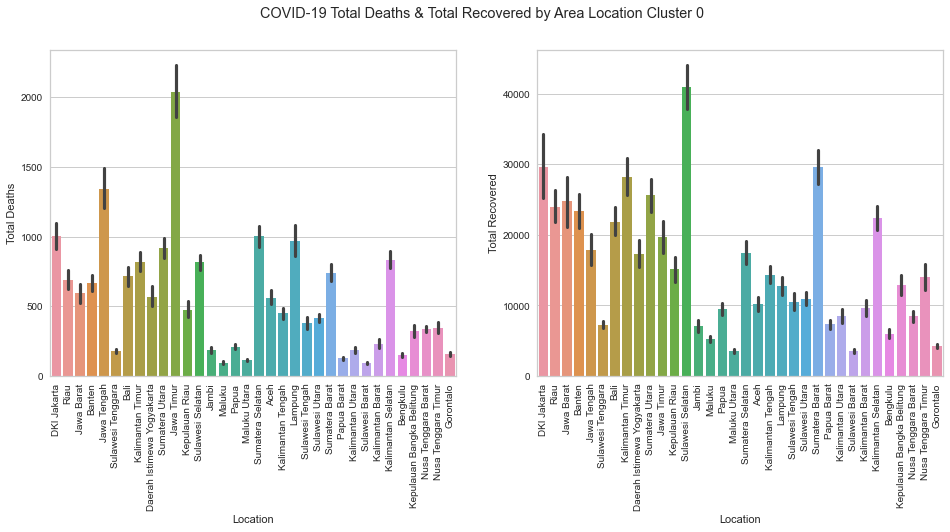

In [73]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('COVID-19 Total Deaths & Total Recovered by Area Location Cluster 0')
plt.xticks(rotation=90)


# Total Deaths
c0 = sns.barplot(ax=axes[0], x='Location', y='Total Deaths', data=hasil_cluster0,)
c0.set_xticklabels(
    c0.get_xticklabels(), 
    rotation=90, 
)

# Total Recovered
c0 = sns.barplot(ax=axes[1], x='Location', y='Total Recovered', data=hasil_cluster0,) 


# CLUSTER 1

In [74]:
## HASIL CLUSTER 1

hasil_cluster1 = data[data["kluster"] == 1]
hasil_cluster1

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,kluster
17134,NaT,ID-JI,Jawa Timur,6912,353,4140,2419,266632,17814,195720,...,170.76,6586.92,8.72,440.08,44.01,6.68%,73.40%,1.04,1.26,1
17169,NaT,ID-JI,Jawa Timur,5700,362,4450,888,272332,18176,200170,...,140.81,6727.73,8.94,449.02,44.90,6.67%,73.50%,0.82,1.03,1
17203,NaT,ID-JT,Jawa Tengah,5656,264,3368,2024,355131,17065,274817,...,155.54,9765.99,7.26,469.28,46.93,4.81%,77.38%,1.04,0.80,1
17204,NaT,ID-JI,Jawa Timur,4764,321,4914,-471,277096,18497,205084,...,117.69,6845.42,7.93,456.95,45.70,6.68%,74.01%,0.84,0.89,1
17238,NaT,ID-JT,Jawa Tengah,3985,295,4702,-1012,359116,17360,279519,...,109.59,9875.57,8.11,477.39,47.74,4.83%,77.84%,0.70,1.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20700,NaT,ID-JI,Jawa Timur,74,0,9,65,398373,29623,368237,...,1.83,9841.47,0.00,731.81,73.18,7.44%,92.44%,1.90,0.00,1
20731,NaT,ID-JT,Jawa Tengah,80,0,28,52,485320,30144,453191,...,2.20,13346.14,0.00,828.95,82.90,6.21%,93.38%,1.23,0.00,1
20762,NaT,ID-JT,Jawa Tengah,52,0,9,43,485372,30144,453200,...,1.43,13347.57,0.00,828.95,82.90,6.21%,93.37%,0.65,1.00,1
20763,NaT,ID-JI,Jawa Timur,59,2,20,37,398497,29631,368278,...,1.46,9844.53,0.05,732.01,73.20,7.44%,92.42%,0.91,0.33,1


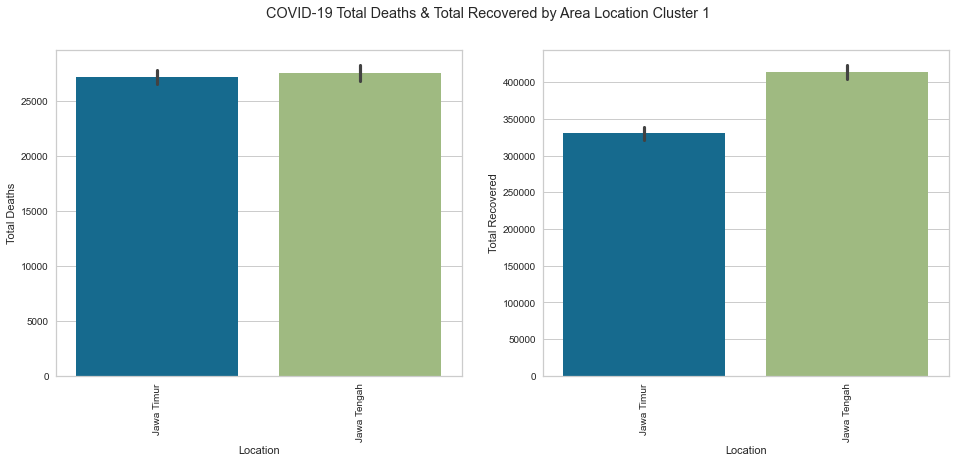

In [77]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('COVID-19 Total Deaths & Total Recovered by Area Location Cluster 1')
plt.xticks(rotation=90)


# Total Deaths
c1 = sns.barplot(ax=axes[0], x='Location', y='Total Deaths', data=hasil_cluster1,)
c1.set_xticklabels(
    c1.get_xticklabels(), 
    rotation=90, 
)

# Total Recovered
c1 = sns.barplot(ax=axes[1], x='Location', y='Total Recovered', data=hasil_cluster1,) 



# CLUSTER 2

In [78]:
## HASIL CLUSTER 2

hasil_cluster2 = data[data["kluster"]==2]
hasil_cluster2

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,kluster
16287,NaT,ID-JK,DKI Jakarta,7379,80,3505,3794,535782,8328,461151,...,680.33,49398.38,7.38,767.83,76.78,1.55%,86.07%,0.88,1.00,2
16322,NaT,ID-JK,DKI Jakarta,7680,71,3522,4087,543462,8399,464673,...,708.09,50106.47,6.55,774.38,77.44,1.55%,85.50%,1.04,0.89,2
16357,NaT,ID-JK,DKI Jakarta,7541,46,3527,3968,551003,8445,468200,...,695.27,50801.74,4.24,778.62,77.86,1.53%,84.97%,0.98,0.65,2
16392,NaT,ID-JK,DKI Jakarta,9399,70,5013,4316,560402,8515,473213,...,866.58,51668.31,6.45,785.07,78.51,1.52%,84.44%,1.25,1.52,2
16427,NaT,ID-JK,DKI Jakarta,9701,16,5681,4004,570103,8531,478894,...,894.42,52562.73,1.48,786.55,78.65,1.50%,84.00%,1.03,0.23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20730,NaT,ID-JB,Jawa Barat,175,1,15,159,706123,14700,689836,...,3.87,15635.57,0.02,325.50,32.55,2.08%,97.69%,2.36,0.50,2
20758,NaT,ID-JK,DKI Jakarta,111,0,0,111,861944,13582,847006,...,10.23,79470.08,0.00,1252.24,125.22,1.58%,98.27%,0.84,1.00,2
20761,NaT,ID-JB,Jawa Barat,161,0,13,148,706284,14700,689849,...,3.56,15639.13,0.00,325.50,32.55,2.08%,97.67%,0.92,0.00,2
20789,NaT,ID-JK,DKI Jakarta,119,0,0,119,862063,13582,847006,...,10.97,79481.05,0.00,1252.24,125.22,1.58%,98.25%,1.07,1.00,2


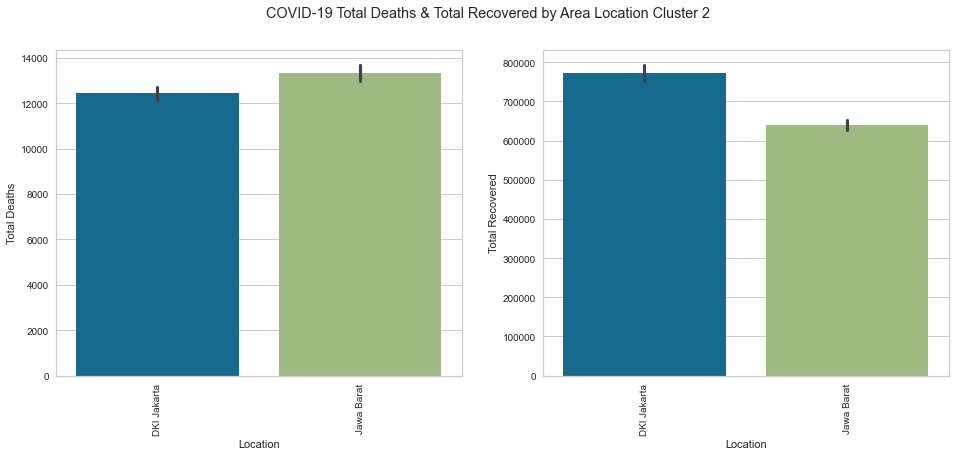

In [79]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('COVID-19 Total Deaths & Total Recovered by Area Location Cluster 2')
plt.xticks(rotation=90)


# Total Deaths
c2 = sns.barplot(ax=axes[0], x='Location', y='Total Deaths', data=hasil_cluster2,)
c2.set_xticklabels(
    c2.get_xticklabels(), 
    rotation=90, 
)

# Total Recovered
c2 = sns.barplot(ax=axes[1], x='Location', y='Total Recovered', data=hasil_cluster2,) 


# CLUSTER 3

In [80]:
## HASIL CLUSTER 3

hasil_cluster3 = data[data["kluster"]>2]
hasil_cluster3

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,kluster
8727,NaT,ID-JK,DKI Jakarta,1273,17,1090,166,130461,2578,118996,...,117.37,12028.33,1.57,237.69,23.77,1.98%,91.21%,1.25,0.89,3
8762,NaT,ID-JK,DKI Jakarta,1064,14,1133,-83,131525,2592,120129,...,98.10,12126.43,1.29,238.98,23.90,1.97%,91.34%,0.84,0.82,3
8797,NaT,ID-JK,DKI Jakarta,1436,15,838,583,132961,2607,120967,...,132.40,12258.83,1.38,240.36,24.04,1.96%,90.98%,1.35,1.07,3
8832,NaT,ID-JK,DKI Jakarta,1370,15,1232,123,134331,2622,122199,...,126.31,12385.14,1.38,241.74,24.17,1.95%,90.97%,0.95,1.00,3
8839,NaT,ID-JI,Jawa Timur,442,32,394,16,61135,4892,56698,...,10.92,1510.29,0.79,120.85,12.09,8.00%,92.74%,1.18,0.74,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20777,NaT,ID-RI,Riau,11,0,3,8,128492,4101,123934,...,1.81,21154.08,0.00,675.16,67.52,3.19%,96.45%,1.38,1.00,3
20787,NaT,ID-BA,Bali,9,0,3,6,113959,4028,109599,...,2.13,27029.03,0.00,955.37,95.54,3.53%,96.17%,0.47,0.00,3
20788,NaT,ID-BT,Banten,18,0,6,12,132435,2686,129409,...,1.68,12351.28,0.00,250.50,25.05,2.03%,97.72%,0.78,1.00,3
20790,NaT,ID-YO,Daerah Istimewa Yogyakarta,39,0,1,38,156067,5250,150231,...,10.74,42981.65,0.00,1445.88,144.59,3.36%,96.26%,0.81,0.00,3


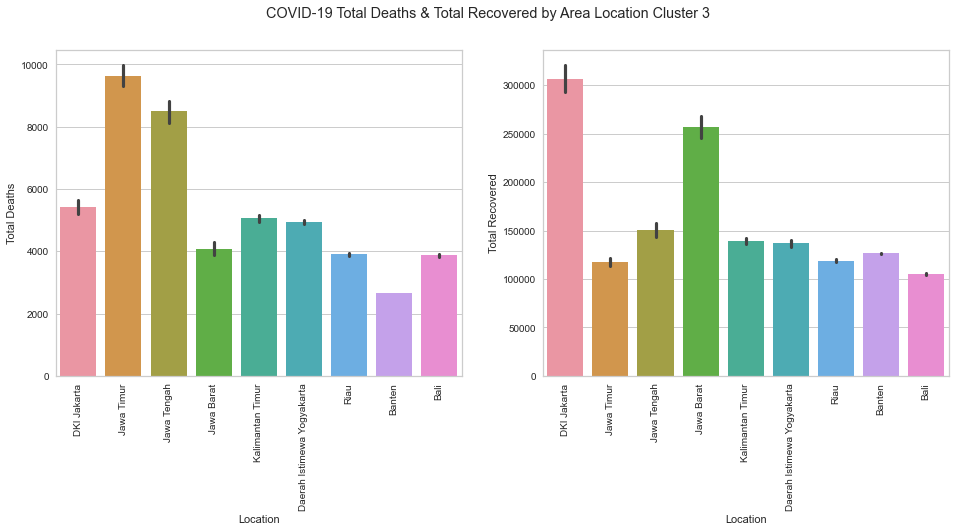

In [81]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('COVID-19 Total Deaths & Total Recovered by Area Location Cluster 3')
plt.xticks(rotation=90)


# Total Deaths
c3 = sns.barplot(ax=axes[0], x='Location', y='Total Deaths', data=hasil_cluster3,)
c3.set_xticklabels(
    c3.get_xticklabels(), 
    rotation=90, 
)

# Total Recovered
c3 = sns.barplot(ax=axes[1], x='Location', y='Total Recovered', data=hasil_cluster3,) 


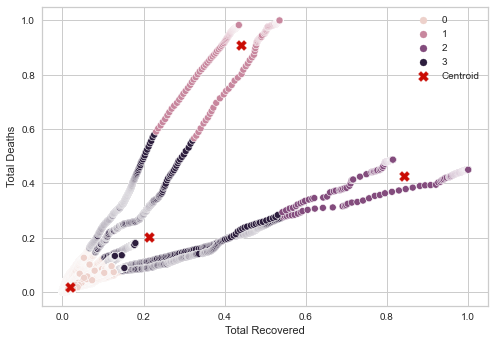

In [82]:

sns.scatterplot(data=df_scaled, y="Total Deaths", x="Total Recovered", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker="X", c="r", s=100, label="Centroid")
plt.legend()
plt.show()

##df_scaled = pd.DataFrame(df_scaled, columns=['Total Recovered','Total Deaths'])

From the results above, it is found that each cluster has its own data characteristics.

**PERSPECTIVE TOTAL DEATHS**
    - Cluster 0 
        16.1 % with total 15315 data
     - Cluster 1 
        42.1 % with total 208 data
     - Cluster 2 
        32.6% with total 222 data
     - Cluster 3 
        9.2 % with total 1191 data 

**PERSPECTIVE TOTAL RECOVERED**
     - Cluster 0 
        14.6 % with total 15315 data
     - Cluster 1 
        38.9 % with total 208 data 
     - Cluster 2 
        46 % with total 222 data
     - Cluster 3 
        0.5 % with total 1191 data
